#### Mapping Starbucks locations in California on a folium map using geopandas and folium library

In [22]:
import geopandas as gpd
import pandas as pd
from pyproj import CRS

Comment:
1. Here our dataset file is a csv file.
2. lets read the data into a pandas dataframe and then convert it into geodataframe.

In [23]:
starbucks_df = pd.read_csv("starbucks_locations.csv")

In [24]:
starbucks_df.head()

,Store Number,Store Name,Address,City,Longitude,Latitude
0,10429-100710,Palmdale & Hwy 395,14136 US Hwy 395 Adelanto CA,Adelanto,-117.40,34.51
1,635-352,Kanan & Thousand Oaks,5827 Kanan Road Agoura CA,Agoura,-118.76,34.16
2,74510-27669,Vons-Agoura Hills #2001,5671 Kanan Rd. Agoura Hills CA,Agoura Hills,-118.76,34.15
3,29839-255026,Target Anaheim T-0677,8148 E SANTA ANA CANYON ROAD AHAHEIM CA,AHAHEIM,-117.75,33.87
4,23463-230284,Safeway - Alameda 3281,2600 5th Street Alameda CA,Alameda,-122.28,37.79


In [25]:
# convert above dataframe into geodataframe

starbucks = gpd.GeoDataFrame(starbucks_df, geometry=gpd.points_from_xy(starbucks_df.Longitude,starbucks_df.Latitude))

Comment:
- We use a coordinate reference system (CRS) to show how the projected points correspond to real locations on Earth.
- Coordinate reference systems are referenced by European Petroleum Survey Group (EPSG) codes.

- This GeoDataFrame uses EPSG 32630, which is more commonly called the "Mercator" projection. This projection preserves angles (making it useful for sea navigation) and slightly distorts area.

- However, when creating a GeoDataFrame from a CSV file, we have to set the CRS. EPSG 4326 corresponds to coordinates in latitude and longitude.

In [26]:
starbucks.crs = CRS('epsg:4362')
starbucks.head()

,Store Number,Store Name,Address,City,Longitude,Latitude,geometry
0,10429-100710,Palmdale & Hwy 395,14136 US Hwy 395 Adelanto CA,Adelanto,-117.40,34.51,POINT (-117.40000 34.51000)
1,635-352,Kanan & Thousand Oaks,5827 Kanan Road Agoura CA,Agoura,-118.76,34.16,POINT (-118.76000 34.16000)
2,74510-27669,Vons-Agoura Hills #2001,5671 Kanan Rd. Agoura Hills CA,Agoura Hills,-118.76,34.15,POINT (-118.76000 34.15000)
3,29839-255026,Target Anaheim T-0677,8148 E SANTA ANA CANYON ROAD AHAHEIM CA,AHAHEIM,-117.75,33.87,POINT (-117.75000 33.87000)
4,23463-230284,Safeway - Alameda 3281,2600 5th Street Alameda CA,Alameda,-122.28,37.79,POINT (-122.28000 37.79000)


Let's Check for null values in our starbucks datset:

In [27]:
starbucks.Latitude.isnull().value_counts()
starbucks.Longitude.isnull().value_counts()

False    2816
True        5
Name: Longitude, dtype: int64

Found 5 Null Longitude and Latitude values. Hence, dropping them.

In [28]:
starbucks.dropna(how='any', inplace=True)

This is how the locations points look without map plot:

<AxesSubplot:>

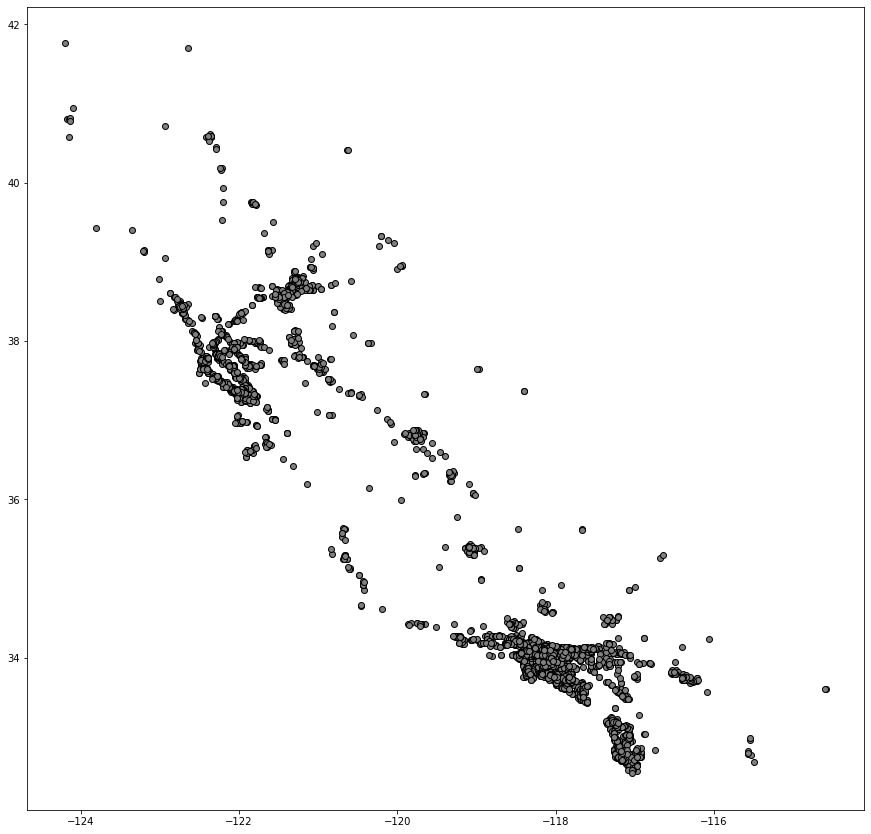

In [29]:
starbucks.plot(figsize=(15,15), color='gray', edgecolor = 'black')

Comment:

- Next, we load in the 'naturalearth_lowres' dataset from GeoPandas, and set americas to a GeoDataFrame containing the boundaries of all countries in the Americas.

In [30]:
# Load a GeoDataFrame with country boundaries in North/South America, print the first 5 rows
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
americas = world.loc[world['continent'].isin(['North America'])]


In [31]:
americas.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
16,10646714,North America,Haiti,HTI,19340.0,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."
17,10734247,North America,Dominican Rep.,DOM,161900.0,"POLYGON ((-71.70830 18.04500, -71.68774 18.316..."
19,329988,North America,Bahamas,BHS,9066.0,"MULTIPOLYGON (((-78.98000 26.79000, -78.51000 ..."


<AxesSubplot:>

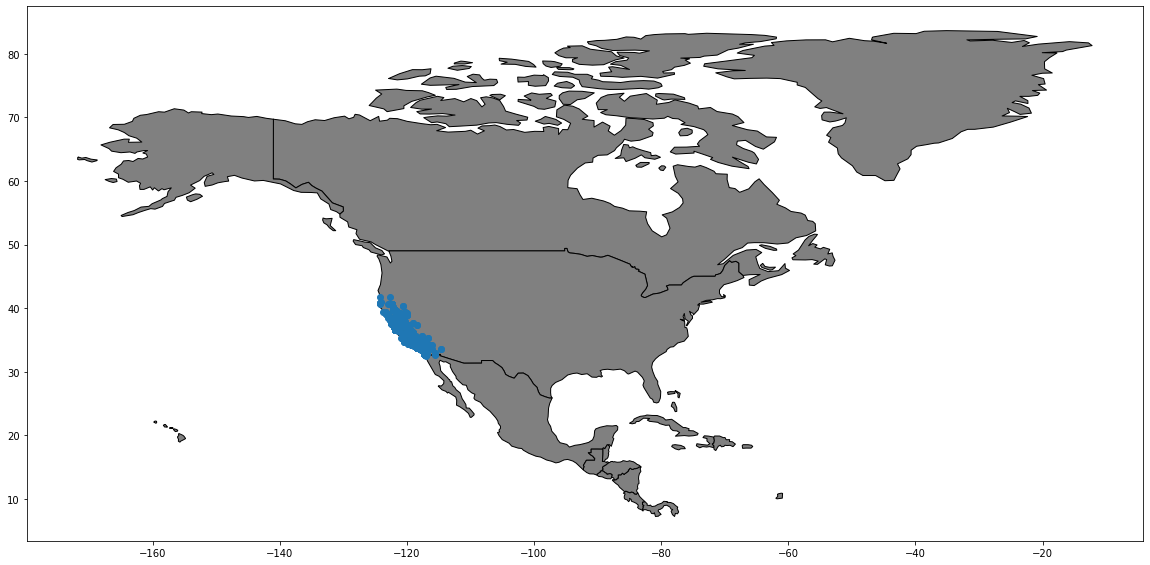

In [32]:
ax = americas.plot(figsize=(20,15), color='gray', edgecolor = 'black')
starbucks.plot(ax = ax)

In [33]:
# importing folium to create folium maps
import folium
from folium import Marker
from folium.plugins import MarkerCluster

folium makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map.

In [42]:
#The dataset we are using is centered in California, USA
# using locations picked from the dataset to center our folium Map.
	
m_1 = folium.Map(location=[33.90,-118.13], tiles='openstreetmap', zoom_start=10)

# below for loop will mark each geometry point on the above folium map.
for idx, row in starbucks.iterrows():
     Marker([row['Latitude'], row['Longitude']]).add_to(m_1)
     # idx == 100 because folium is getting overloaded to mark all the points in the dataset
     if idx == 100:
         break

# Didplay the Markers
m_1

- Marker function is slow to locate each point on the Folium Map and which looked messy.
- lets use the folium plugin MarkerCluster to declutter and make the zoom ins faster.

In [43]:
# create a map
m_2 = folium.Map(location=[33.90,-118.13], tiles='CartoDB positron', zoom_start=13)

# add points to the Map
import math
mc = MarkerCluster()
for idx, row in starbucks.iterrows():
    if not math.isnan(row['Longitude']) and not math.isnan(row['Latitude']):
        mc.add_child(Marker([row['Latitude'],row['Longitude']]))
m_2.add_child(mc)


# display the map
m_2

